# Chi-square Test di indipendenza in R

## Analisi Ritardo consegne fornitori vs. Ritardo sui pagamenti forniture

L'azienda è interessata a sapere se l'eventuale ritardo dei pagamenti su alcune forniture influisce sul ritardo delle consegne da parte di alcuni fornitori.

In questo caso possima utilizzare un test Chi-quadro. Una decisione verrà presa riguardo alle due variabili (*ritardo pagamenti* e *ritardo consegne*) se esse saranno dipendenti in base ai dati raccolti. I dati sono stati immagazzinati in un file csv: *dati_pagamento_fornitori.csv*

Le singole variabili indicano:

 - ***fornitore_ID*** : indica l'identificativo del fornitore
 - ***eta_*** : sono il numero di anni che il fornitore collabora con l'azienza
 - ***valore_annuale_K*** : è il valore medio annuale di acquisto espresso in K(migliaia) di €
 - ***valore_medio_componente*** : valore medio per componente acquistato in €
 - ***num_acquisti*** : il numero totale di fatture emesse dall'inizo della collaborazione
 - ***importanza*** : importanza strategica del fornitore "A"=alata, "B"=media e "C"=bassa
 - ***consegne_puntuali*** : "Sempre", "Mai" e "Spesso" = "a volte sì a volte no"
 - ***pagamenti_puntuali*** : "Contenzioso", "Sempre", "A volte", "Mai" = "sempre in ritardo sui pagamenti"
 - ***media_gg_ritardo_pagamenti*** : la media del numero di giorni di ritardo sui pagamenti per fornitore

In [1]:
# comincio ad inizializzare le librerie e imporare il file
library(RCurl)  # prende il file dal link

dat_file <- getURL("https://raw.githubusercontent.com/LorenzoNegri/Investigazioni-Statistiche-Fornitori/master/Test%20Chi-square%20Indipendenza/dati_pagamento_fornitori.csv")
Dat <- read.csv(text = dat_file)

Loading required package: bitops


In [2]:
head(Dat)

fornitore_ID,eta_,valore_annuale_K,valore_medio_componente,num_acquisti,importanza,consegne_puntuali,pagamenti_puntuali,media_gg_ritardo_pagamenti
<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<int>
28920,3,18.50,2.09,92,A,Spesso,Sempre,10
367309,11,39.00,0.61,104,A,Mai,Mai,89
163622,6,36.00,1.64,87,C,Mai,A volte,NA
185887,5,25.07,NA,NA,C,Mai,Sempre,8
714466,11,33.33,1.35,35,B,Spesso,Sempre,9
533200,6,36.00,1.38,64,B,Spesso,Sempre,4


In [11]:
summary(Dat) #statistiche descrittive di base

  fornitore_ID         eta_        valore_annuale_K valore_medio_componente
 Min.   :   895   Min.   : 1.000   Min.   : 9.33    Min.   : 0.150         
 1st Qu.:210294   1st Qu.: 5.000   1st Qu.:17.57    1st Qu.: 0.420         
 Median :475427   Median : 9.000   Median :24.80    Median : 0.830         
 Mean   :474796   Mean   : 9.826   Mean   :25.47    Mean   : 1.478         
 3rd Qu.:725401   3rd Qu.:14.000   3rd Qu.:34.04    3rd Qu.: 1.460         
 Max.   :995992   Max.   :21.333   Max.   :46.40    Max.   :15.480         
                                   NA's   :1        NA's   :46             
  num_acquisti    importanza consegne_puntuali   pagamenti_puntuali
 Min.   : 35.00   A: 39      Mai   : 24        A volte    : 19     
 1st Qu.: 66.00   B:147      Sempre:115        Contenzioso: 11     
 Median : 72.50   C: 51      Spesso: 98        Mai        : 18     
 Mean   : 74.15                                Sempre     :189     
 3rd Qu.: 80.00                                     

In alto possiamo vedere delle statistiche riepilogative per ogni variabile.

## Test Chi-quadro

Lo scopo della ricerca è capire se le *consegne puntuali* siano indipendenti dai *pagamenti puntuali*, se così non fosse, l'azienda potrebbe prendere decisioni in merito. La formula per il test è la seguente:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/05/34.png">

In R il test avviene in modo semplice, come prima cosa elaboro una tabella a matrice con le due variabili a cui siamo interessati. In questo modo possiamo sapere quante volte in una condizione è avventua l'altra:

In [12]:
tbl = table(Dat$pagamenti_puntuali, Dat$consegne_puntuali)
tbl

             
              Mai Sempre Spesso
  A volte       3     12      4
  Contenzioso   1      7      3
  Mai           2      9      7
  Sempre       18     87     84

Nella tabella a sx vediamo i valori per i **pagamenti puntuali** in relazione in alto alle **consegne puntuali**.

In [17]:
# posso eseguire il chi-quadro test con la funzione
chisq.test(tbl)

Warning message in chisq.test(tbl):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  tbl
X-squared = 5.1889, df = 6, p-value = 0.5198


In [19]:
chisq.test(tbl, simulate.p.value = TRUE)


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  tbl
X-squared = 5.1889, df = NA, p-value = 0.5082


Il p-value (>> di 0.05) indica che non c'è alcuna dipidenza tra le due variabili; ***i ritardi sulle consegne non dipendono dai ritardi sui pagamenti***.

## Analisi Correlazioni

Vediamo ora se esiste qualche correlazione tra le variabili. Comincio con preparare i dati in matrice escludendo le variabili categoriche e quella del ID fornitore:

In [3]:
dat_mx = as.matrix(Dat[, -which(names(Dat) %in% c("fornitore_ID","importanza", "consegne_puntuali", "pagamenti_puntuali"))])
head(dat_mx) # visualizzo solo le prime 6 righe

eta_,valore_annuale_K,valore_medio_componente,num_acquisti,media_gg_ritardo_pagamenti
3,18.50,2.09,92,10
11,39.00,0.61,104,89
6,36.00,1.64,87,NA
5,25.07,NA,NA,8
11,33.33,1.35,35,9
6,36.00,1.38,64,4


Eseguo un test sulle correlazioni tra le variabili numeriche che abbiamo, cercando di capire se qualcuna possa essere correlata al numero medio di giorni di ritardo per i pagamenti delle fatture.

In [25]:
library(corrr)
library(tidyverse)

In [26]:
# correlazioni con la libreria corrr
rdf <- dat_mx %>% correlate(method = c("pearson", "kendall", "spearman"))
rdf


Correlation method: 'pearsonkendallspearman'
Missing treated using: 'pairwise.complete.obs'



rowname,eta_,valore_annuale_K,valore_medio_componente,num_acquisti,media_gg_ritardo_pagamenti
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eta_,NA,-0.02769412,-0.60013574,0.08628113,0.05478127
valore_annuale_K,-0.02769412,NA,0.29902463,0.05926059,0.14456271
valore_medio_componente,-0.60013574,0.29902463,NA,-0.06012457,-0.06241399
num_acquisti,0.08628113,0.05926059,-0.06012457,NA,0.09278359
media_gg_ritardo_pagamenti,0.05478127,0.14456271,-0.06241399,0.09278359,NA


A prima vista si nota una correlazione negativa tra il valore medio dei compenenti acquistati e il numero degli anni in cui il fabbricante è fornitore dell'azienda. Vediamo di capire meglio con un grafico del netwrok di correlazioni:

Corrr Network
   


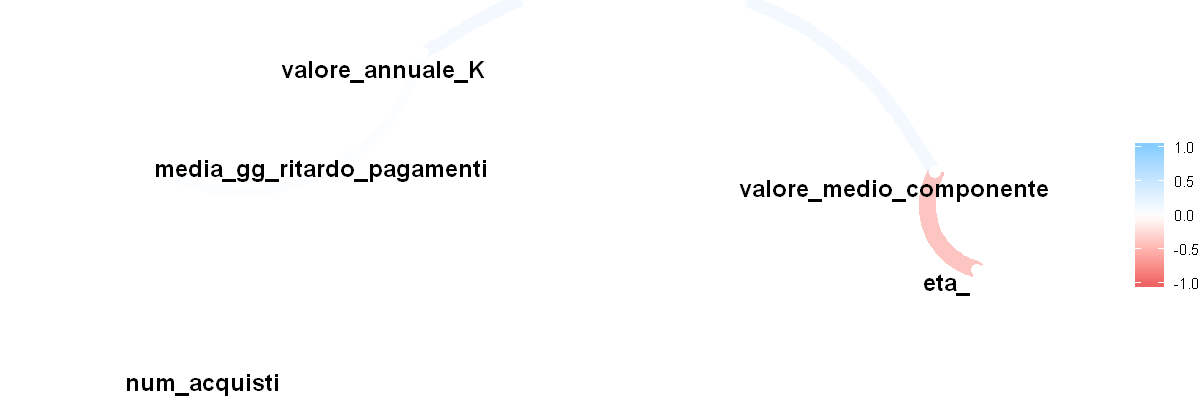

In [33]:
library(repr) # utilizzo il package "repr" per avere più controllo sulle dimensioni dei grafici
    options(repr.plot.width=10, repr.plot.height=3.5)

# network correlation plot
cat("Corrr Network\n   \n")
rdf %>% network_plot(min_cor = .1)

Possiamo vedere nel grafico la media dei giorni di ritardo è influenzata solo lievemente dal valore annuale di acquisti che l'azienda compie da quel dato fornitore (i giorni di ritardo tendono ad aumentare con il valore di acquisto annuale).

L'unica correlazione degna di nota è quella tra gli anni di esercizio del fornitore in azienda e il valore medio del componente, e in questo caso è in negativo, cioè al crescere del tempo che il fornitore collabora con l'azienda, il valore medio dei componenti acquistati diminuisce, questo può voler dire che il responsabile acquisti sta svolgendo un buon lavoro poichè nel tempo i prezzi tendono a calare, rispetto invece ai nuovi fornitori che hanno una media prezzi più alti. 

Esiste anche una velata correlazine positiva tra l'età del fornitore che opera con l'azienda e il numero di fatture mediamente emesse durante l'anno; questo indica che all'aumentare dell'età amuntano lievemente il numero di acquisti da quel dato fornitore.

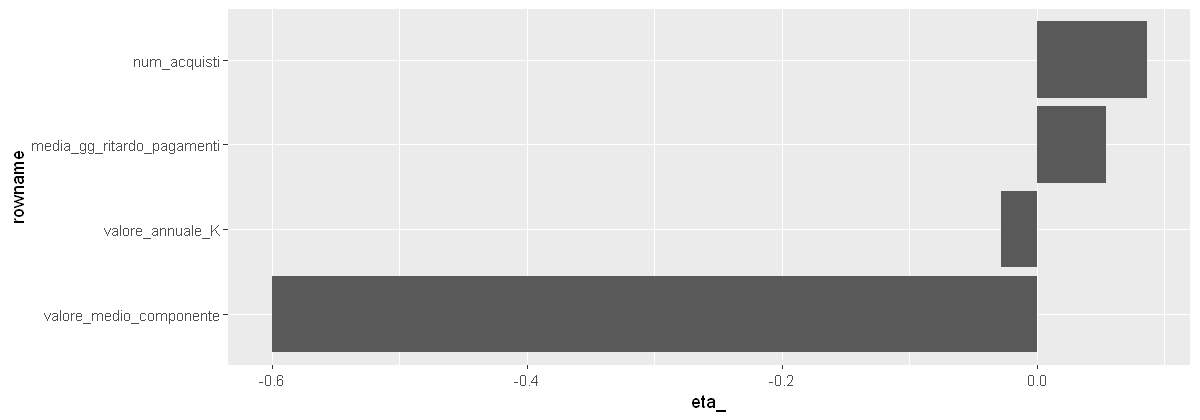

In [36]:
rdf %>%
  focus(eta_) %>%
  mutate(rowname = reorder(rowname, eta_)) %>%
  ggplot(aes(rowname, eta_)) +
    geom_col() + coord_flip()

## Conclusioni

Non è emersa nessuna dipendenza e/o correlazione tra i dati dei ritardi sui pagamenti con i ritardi sulle consegne. La altre correlazioni evinte dall'analisi, sono frutto di della normale atività aziendale.